# Predicting used car prices

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Import dataset

In [2]:
data = pd.read_csv(r"C:\Users\manit\OneDrive\Documents\GitHub\data_science_internship\TestProject\dataset.csv")
data.sample(8)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4362,4362,Hyundai EON Magna,Jaipur,2016,27886,Petrol,Manual,First,22.0 kmpl,814 CC,55 bhp,5.0,NaN,2.85
5471,5471,Mahindra XUV500 W6 2WD,Jaipur,2014,88511,Diesel,Manual,First,16.0 kmpl,2179 CC,140 bhp,7.0,NaN,8.25
3440,3440,Ford Ecosport 1.5 DV5 MT Titanium Optional,Coimbatore,2014,70374,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,NaN,7.34
3611,3611,Honda City 1.5 V MT,Kochi,2011,94832,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,3.83
3814,3814,Jaguar XF 3.0 Litre S Premium Luxury,Mumbai,2014,30900,Diesel,Automatic,First,14.74 kmpl,2993 CC,270.9 bhp,5.0,NaN,29.50
1879,1879,Hyundai i20 Magna,Jaipur,2012,100000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,3.25
3865,3865,Ford Ecosport 1.5 DV5 MT Titanium,Delhi,2014,60000,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,NaN,5.50
4537,4537,BMW 3 Series 320d Highline,Hyderabad,2009,58000,Diesel,Automatic,First,16.07 kmpl,1995 CC,181 bhp,5.0,NaN,13.50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


## Data Cleaning 
* missingno is a quick and easy way used to visualize missing values in the datasets
* using dropna to remove the null valued records from the datasets

<Axes: >

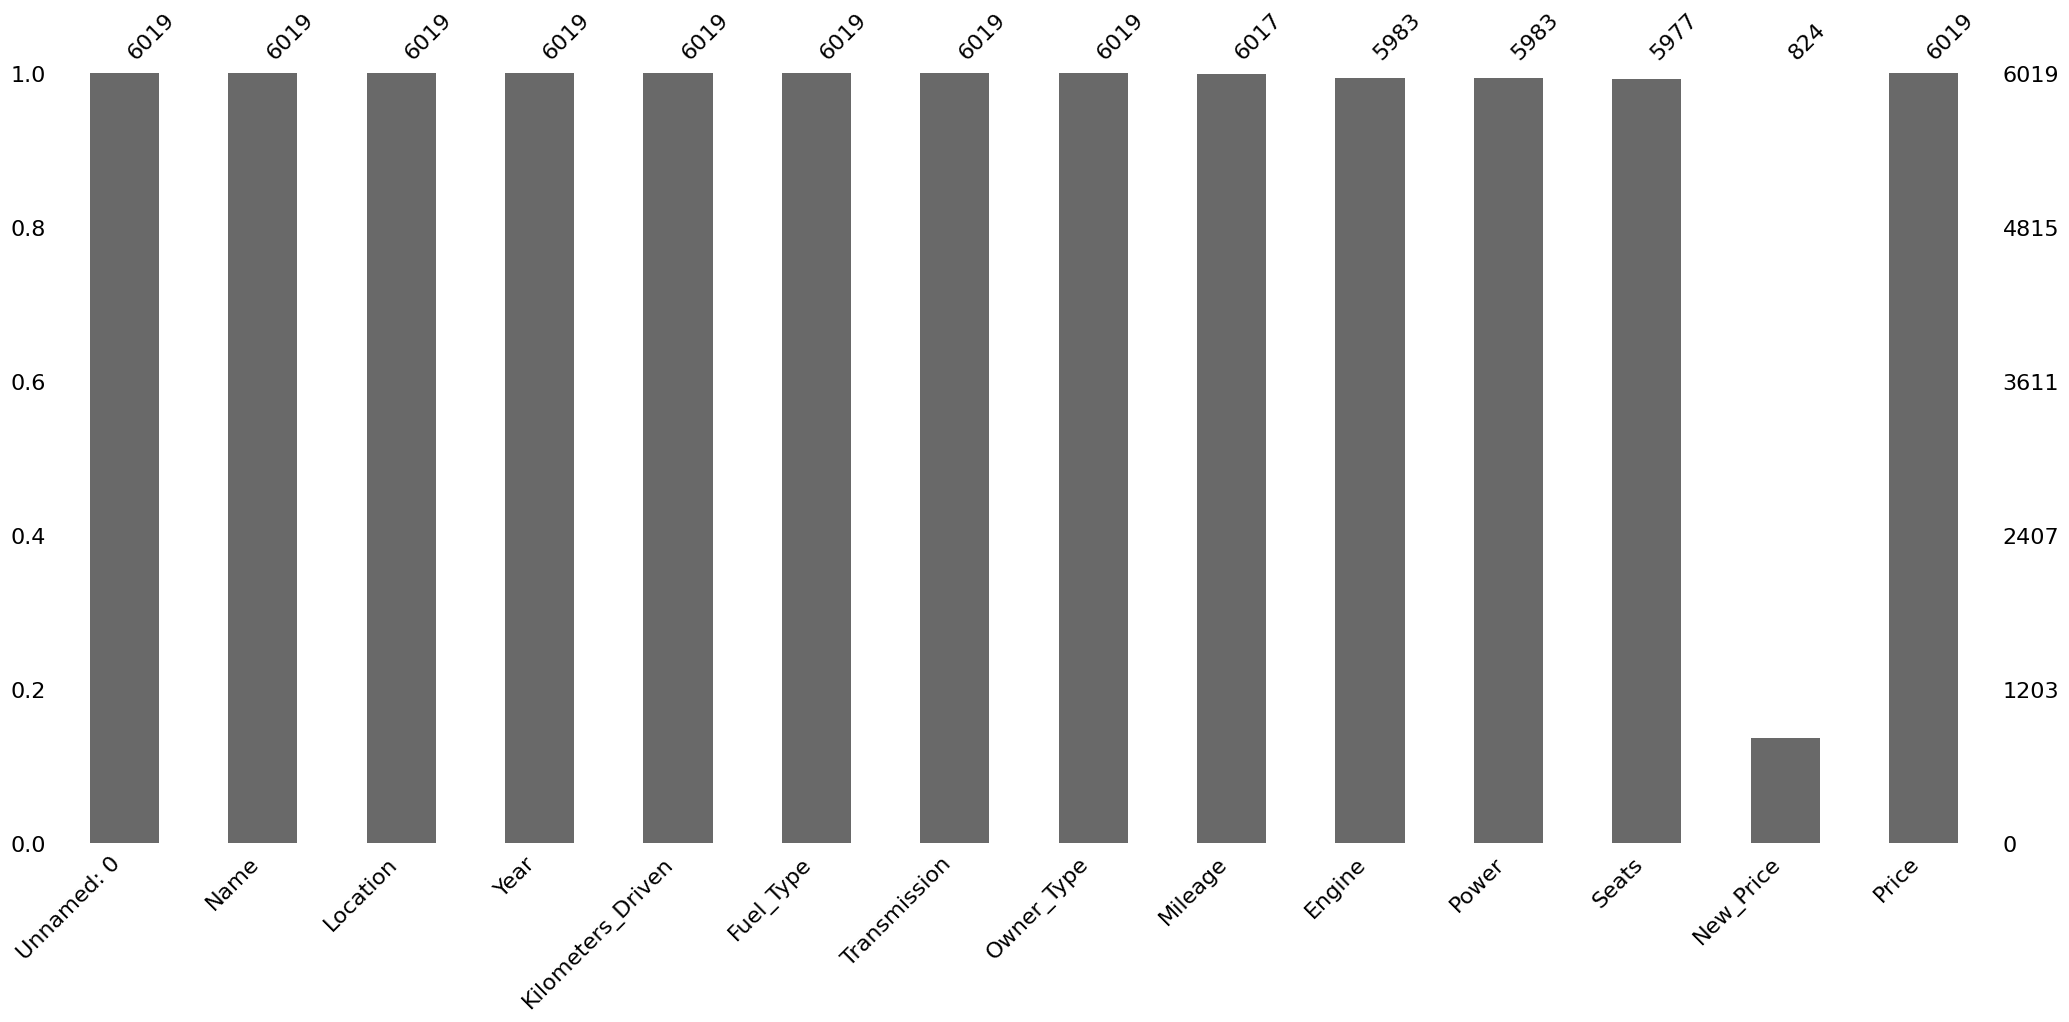

In [4]:
import missingno as msno
msno.bar(data)

In [5]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
data = data.dropna(how='any',axis=0)
data.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

## Test Train Split
* 70% as train data and 30% as test data
* training data is used to train the machine learning models and test data is used to check the accuracy of the model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], 
                                                    data.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)
# iloc[:, :-1] selects the column except the last 
# iloc[:, -1] selects the last column

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 1773 to 732
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         576 non-null    int64  
 1   Name               576 non-null    object 
 2   Location           576 non-null    object 
 3   Year               576 non-null    int64  
 4   Kilometers_Driven  576 non-null    int64  
 5   Fuel_Type          576 non-null    object 
 6   Transmission       576 non-null    object 
 7   Owner_Type         576 non-null    object 
 8   Mileage            576 non-null    object 
 9   Engine             576 non-null    object 
 10  Power              576 non-null    object 
 11  Seats              576 non-null    float64
 12  New_Price          576 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 63.0+ KB


In [9]:
# y_train holds the training data to which the test model needs to be trained for better accuracy
y_train

1773     9.29
1652    38.00
3244    17.50
2371     3.90
962     39.50
        ...  
456      8.92
750     10.65
2008    16.50
3127     9.51
732      5.70
Name: Price, Length: 576, dtype: float64

## Exploratory Data Analysis
* Let's explore the various columns and draw information about how useful each columns are

### Index

The first column is the index for each data point and hence we can simply remove it.

In [10]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [11]:
# the index numbers aren't considered for the prediction
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 1773 to 732
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               576 non-null    object 
 1   Location           576 non-null    object 
 2   Year               576 non-null    int64  
 3   Kilometers_Driven  576 non-null    int64  
 4   Fuel_Type          576 non-null    object 
 5   Transmission       576 non-null    object 
 6   Owner_Type         576 non-null    object 
 7   Mileage            576 non-null    object 
 8   Engine             576 non-null    object 
 9   Power              576 non-null    object 
 10  Seats              576 non-null    float64
 11  New_Price          576 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 58.5+ KB


### Name
**Let's explore the various cars in the dataset**

In [12]:
X_train["Name"].value_counts()

BMW 3 Series 320d                            11
Hyundai Grand i10 1.2 Kappa Sportz           10
Maruti Alto K10 VXI                          10
BMW 5 Series 520d Luxury Line                 8
Maruti Vitara Brezza ZDi Plus Dual Tone       8
                                             ..
Hyundai Creta 1.4 E Plus Diesel               1
Tata Nexon 1.5 Revotorq XZ Plus Dual Tone     1
Isuzu MUX 4WD                                 1
Volkswagen Polo 1.0 MPI Comfortline           1
Maruti S-Cross Delta DDiS 200 SH              1
Name: Name, Length: 264, dtype: int64

* we can say that there are several cars in the dataset, some of them with a count > 1
* the resale value of the car may also depend upon the manufacturers. So let's extract the manufacturer from this column and add it to the dataset.

In [13]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [14]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

**Let's also confirm that there are no null values and identify all unique values**

Text(0, 0.5, 'Count of cars')

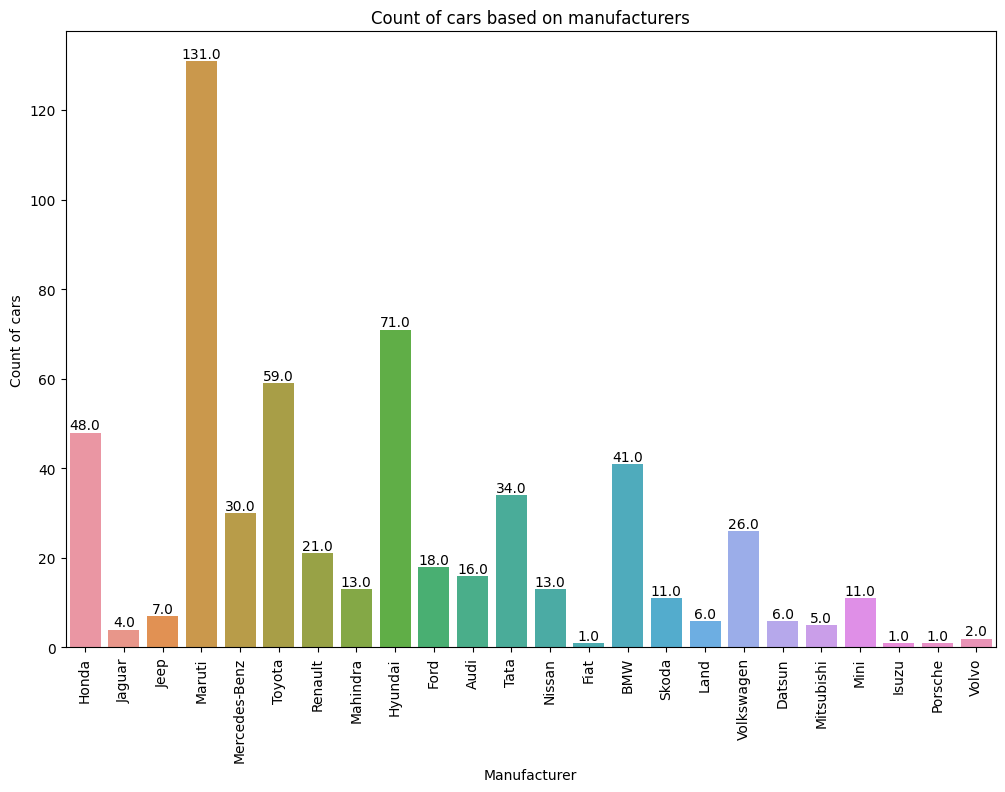

In [15]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

* from the above plot we can infer that Maximum cars in the dataset are by the manufactured **Maruti**
* I'll also drop the `Name` column.

In [16]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [17]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [18]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

### Kilometers_Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [19]:
X_train["Kilometers_Driven"]

1773    15135
1652     4000
3244    15050
2371    29202
962      8682
        ...  
456     12923
750     18955
2008    67000
3127    35981
732     55818
Name: Kilometers_Driven, Length: 576, dtype: int64

The data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure.

## Mileage

This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [20]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

Let's check for missing values.

In [21]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


There is no missing value in each

### Engine, Power and Seats
* Removing the units of the recorded data, as they aren't needed for our prediction
* The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so remove `bhp` from it.

In [22]:
X_train.sample(3)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer
3266,8,7501,Petrol,Automatic,First,10.0,2996 CC,333 bhp,4.0,87.57 Lakh,Mercedes-Benz
2073,6,2000,Diesel,Automatic,First,20.7,1496 CC,113.98 bhp,5.0,42.48 Lakh,Mini
2229,5,20300,Petrol,Automatic,First,18.0,1497 CC,117.3 bhp,5.0,17.38 Lakh,Honda


In [23]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [24]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

In [26]:
X_train.sample(3)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Manufacturer
5280,9,38000,Petrol,Manual,First,16.09,1598,103.5,5.0,10.94 Lakh,Volkswagen
2054,6,1000,Petrol,Manual,First,20.89,1197,81.8,5.0,7.87 Lakh,Maruti
654,12,64357,Petrol,Manual,First,24.07,998,67.1,5.0,4.7 Lakh,Maruti


### New Price

As most of the values are missing, I'll drop this column altogether.

In [27]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

<Axes: xlabel='Kilometers_Driven', ylabel='Mileage'>

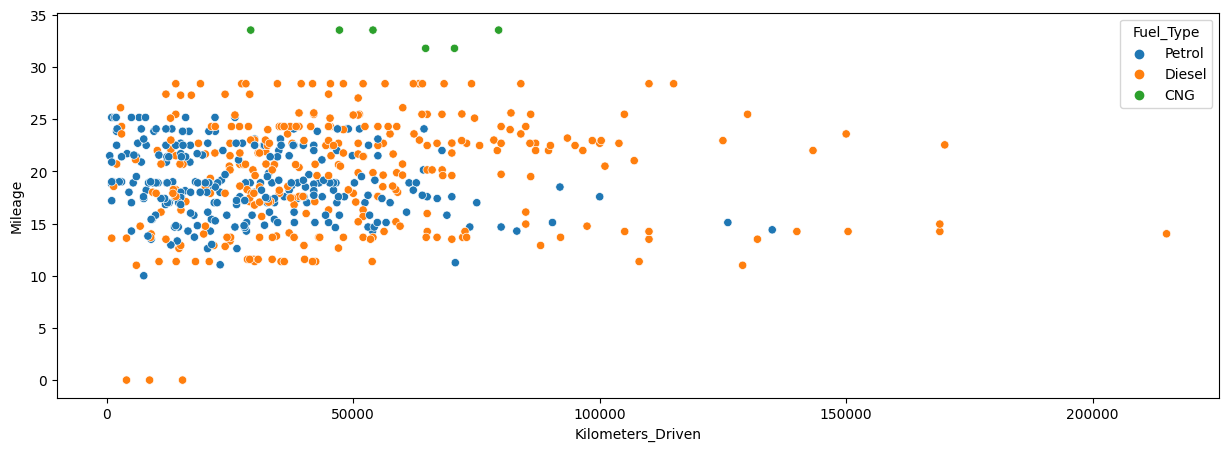

In [35]:
plt.figure(figsize=(15,5))
sns.scatterplot(X_train, y='Mileage', x='Kilometers_Driven', hue='Fuel_Type')

## Data Processing

Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [37]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [38]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [39]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

Finally, as the last step of data processing, I'll scale the data.

In [40]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## Training and predicting

I'll create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions.

In [41]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.8318091414739616

In [42]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8435687391236713

The `Random Forest` model performed the best with a R2 score of approx **0.843**.